torchvision 包含支持加载类似Imagenet，CIFAR10.MNIST 等公共数据集的数据加载模块 torchvision.datasets
以及支持加载图像数据转换模块：torch.utils.data.DataLoader

CIFAR10数据集，
* 它包含十个类别：‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’。
* CIFAR-10 中的图像尺寸为33232，也就是RGB的3层颜色通道，每层通道内的尺寸为32*32

#### 训练一个图像分类器
* 使用torchvision加载并且归一化CIFAR10的训练和测试数据集
* 定义一个卷积神经网络
* 定义一个损失函数
* 在训练样本数据上训练网络
* 在测试样本数据上测试网络

1、加载并归一化CIFAR10训练和测试数据

In [10]:
# 加载训练数据
import torch
import torchvision
import torchvision.transforms as transforms

# 展示训练图片
import matplotlib.pyplot as plt
import numpy as np

# 定义卷积网络
import torch.nn as nn
import torch.nn.functional as func

# 损失函数和优化器
import torch.optim as optim


* torchvision数据集的输出范围是在[0,1]之间的PILImage，将其转换成归一化范围的[-1,1]之间的张量Tensors

In [11]:
transform = transforms.Compose([  # 将transforms组合在一起，每个transforms都有自己的功能 
    transforms.ToTensor(),  #转换为tensor格式，将灰度从0-255变换为0-1之间
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # 把0-1变换到(-1,1)
])

# lambda x: transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))(transforms.ToTensor()(x))

# 训练数据加载：CIFAR10
trainset = torchvision.datasets.CIFAR10(root='./data',
                                        train=True,
                                        download=True,
                                        transform=transform)
# 训练数据数据转换
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=4, shuffle=True,
    num_workers=2)  # shuffle 要不要打乱数据 (打乱比较好) num_workers 多线程读取数据

# 测试数据加载
testset = torchvision.datasets.CIFAR10(root='./data',
                                       train=True,
                                       download=True,
                                       transform=transform)
# 测试数据数据转换
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=4,
                                         shuffle=False,
                                         num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse',
           'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


展示训练图片

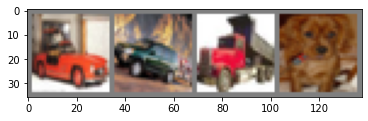

  car   car truck   dog


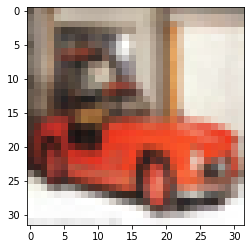

car


In [12]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    nping = img.numpy()
    plt.imshow(np.transpose(nping, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()  #图像值 标签值

# show images
imshow(torchvision.utils.make_grid(images))  #将多张图片组成一张图片
# show labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

imshow(images[0])
print(classes[labels[0]])


定义卷积神经网络

In [13]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool= nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(6,16,5)
        self.fc1=nn.Linear(16*5*5,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)

    def forward(self,x):
        x=self.pool(func.relu(self.conv1(x)))
        x=self.pool(func.relu(self.conv2(x)))
        x=x.view(-1,16*5*5)
        x=func.relu(self.fc1(x))
        x=func.relu(self.fc2(x))
        x=self.fc3(x)

        return x
        
net = Net()

定义一个损失函数和优化器
* cross-entropy 作损失函数
* 动量SGD 作优化器

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

训练网络

In [15]:
for epoch in range(2):

    running_loss=0.0
    for i,data in enumerate(trainloader,0):
        # get the inputs
        inputs,labels=data
        #zero the parameter gradients
        optimizer.zero_grad()
        # forward backward optimize
        outputs=net(inputs)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss +=loss.item()
        if i%2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss=0.0
    
    print('Finished Training')

[1,  2000] loss: 2.181
[1,  4000] loss: 1.860
[1,  6000] loss: 1.683
[1,  8000] loss: 1.608
[1, 10000] loss: 1.537
[1, 12000] loss: 1.470
Finished Training
[2,  2000] loss: 1.401
[2,  4000] loss: 1.372
[2,  6000] loss: 1.332
[2,  8000] loss: 1.332
[2, 10000] loss: 1.301
[2, 12000] loss: 1.287
Finished Training
